**Decision Tree**

Imagine a Decision Tree as a flowchart or a game of "20 Questions." It makes decisions by asking a series of questions about your data, leading you to a conclusion.
Easy to understand, little data prep needed, but its prone to overfitting. small change in data can lead to different tree structure entirely. so its prone to bias.

**Random Forest**

Now, imagine taking a "forest" of many individual Decision Trees and having them all work together. That's a Random Forest! It's an ensemble method, meaning it combines multiple models to get a better, more robust result.
bagging is used for selecting dataset - each tree may have different set of data.

For Classification: When making a prediction, all the trees in the forest "vote" on the outcome, and the class with the most votes wins.

For Regression: The predictions from all individual trees are averaged to get the final prediction.


A Decision Tree is a single flowchart. A Random Forest is a powerful "committee" of many independently built Decision Trees whose combined decisions are more accurate and reliable than any single tree could be.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [12]:
df = pd.read_csv('../sample_data/shows.csv')
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [13]:
d = {'UK':0,'USA':0,'N':2}
df['Nationality'] =  df['Nationality'].map(d)
d1 = {'YES':1,'NO':0}
df['Go'] = df['Go'].map(d1)
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,0,0
2,23,4,6,2,0
3,52,4,4,0,0
4,43,21,8,0,1


In [14]:
df.columns

Index(['Age', 'Experience', 'Rank', 'Nationality', 'Go'], dtype='object')

In [15]:
features = ['Age', 'Experience', 'Rank', 'Nationality']
x = df[features]
y = df['Go']

In [16]:
dtree = DecisionTreeClassifier()
dtree.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

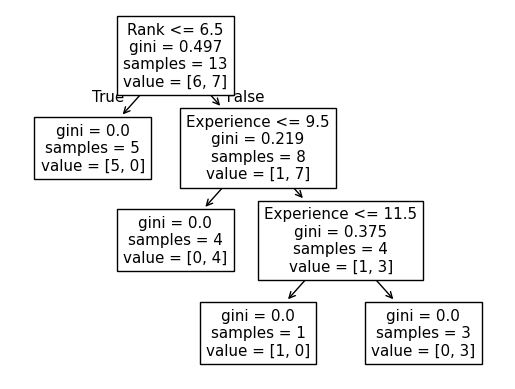

In [17]:
tree.plot_tree(dtree,feature_names = features)

In [18]:
print(df.to_string())

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            0   0
2    23           4     6            2   0
3    52           4     4            0   0
4    43          21     8            0   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            0   0
11   18           3     7            0   1
12   45           9     9            0   1


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,dtree.predict(x)))
print(confusion_matrix(y,dtree.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[6 0]
 [0 7]]


In [24]:
print(dtree.predict([[40,10,9,1]]))

[0]


C:\Users\megha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Gini Impurity**  is a measure of how "pure" or "mixed" a node is in a decision tree.

A Gini Impurity of 0 signifies a perfectly pure node.0.5 means maximum impurity (where number of 'yes' is equal to 'no').

**Random forests**

In [25]:
df = pd.read_csv('../sample_data/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [26]:
df.shape

(81, 4)

In [27]:
df.describe

<bound method NDFrame.describe of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [29]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [30]:
x = df.drop('Kyphosis',axis = 1)
y = df['Kyphosis']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
pred_tree = dtree.predict(x_test)

In [36]:
print(confusion_matrix(y_test,pred_tree))
print(classification_report(y_test,pred_tree))

[[16  5]
 [ 3  1]]
              precision    recall  f1-score   support

      absent       0.84      0.76      0.80        21
     present       0.17      0.25      0.20         4

    accuracy                           0.68        25
   macro avg       0.50      0.51      0.50        25
weighted avg       0.73      0.68      0.70        25



In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [40]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[19  2]
 [ 3  1]]
              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25

